In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import plotly.express as px
import geocoder
import gradio as gr

In [84]:
address = ['Denisstraße 30, 67663 Kaiserslautern','Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach',
          'Oswald-Wiersich-Straße 3, 67433 Neustadt an der Weinstraße',
          'Hillstraße 1, 66953 Pirmasens','Am Vierherrenwald 8, 66424 Homburg',
           'Gilletstraße 7, 76829 Landau in der Pfalz','Mannheimer Str. 68, 67098 Bad Dürkheim',
          'Industriestraße 58, 67063 Ludwigshafen am Rhein','Wormser Str. 95, 67227 Frankenthal',
          'Fraunhoferstraße 7, 68309 Mannheim','Helmertstraße 2, 68219 Mannheim',
           'Schafhäuser Str. 24, 55232 Alzey','Bosenheimer Str. 284a, 55543 Bad Kreuznach',
          'Westspange 5, 66538 Neunkirchen','August-Balthasar-Straße 4a, 66606 St. Wendel',
          'Im Rotfeld 21, 66115 Saarbrücken','John-F.-Kennedy-Straße 10, 55743 Idar-Oberstein',
          'Trierer Str. 89a, 66265 Heusweiler','Neumühler Weg 32/2, 66130 Saarbrücken',
          'Franz-Birringer-Straße 9, 66839 Schmelz','Erbringer Str. 2, 66763 Dillingen/Saar',
          'Ruwerer Str. 23b, 54292 Trier','Diedenhofener Str. 1, 54294 Trier',
           'Industriestraße 2, 76189 Karlsruhe','Schwieberdinger Str. 100, 70825 Korntal-Münchingen',
          'Dieselstraße 8, 74076 Heilbronn']

In [64]:
df = pd.DataFrame(data=address, columns=['address'])
df.head()

,address
0,"Denisstraße 30, 67663 Kaiserslautern"
1,"Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach"
2,"Oswald-Wiersich-Straße 3, 67433 Neustadt an de..."
3,"Hillstraße 1, 66953 Pirmasens"
4,"Am Vierherrenwald 8, 66424 Homburg"


In [65]:
lat = []
lon = []

for index, row in df.iterrows():
    g = geocoder.arcgis(row.values)
    lat.append(g.lat)
    lon.append(g.lng)

df['lat'] = lat
df['lon'] = lon
df.head()

,address,lat,lon
0,"Denisstraße 30, 67663 Kaiserslautern",49.443800,7.717972
1,"Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach",49.421087,7.565257
2,"Oswald-Wiersich-Straße 3, 67433 Neustadt an de...",49.343355,8.177594
3,"Hillstraße 1, 66953 Pirmasens",49.212906,7.599170
4,"Am Vierherrenwald 8, 66424 Homburg",49.329595,7.320419


In [48]:
# size=df_kl['Steige']*100
#color, size

# fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=5, mapbox_style="open-street-map")
# fig.show()
# fig.write_html("Wuerth.html")

In [82]:
address = []

df['Zustand'] = 'zu tun'
df.head()

,address,lat,lon,Zustand
0,"Denisstraße 30, 67663 Kaiserslautern",49.443800,7.717972,zu tun
1,"Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach",49.421087,7.565257,zu tun
2,"Oswald-Wiersich-Straße 3, 67433 Neustadt an de...",49.343355,8.177594,zu tun
3,"Hillstraße 1, 66953 Pirmasens",49.212906,7.599170,zu tun
4,"Am Vierherrenwald 8, 66424 Homburg",49.329595,7.320419,zu tun


In [83]:
def plot():
    global address
    
    if not address:
        fig, ax = plt.subplots()
        fig.set_size_inches(5,5)
        ax = px.scatter_mapbox(df, lat='lat', lon='lon', zoom=6, mapbox_style="open-street-map",
                              color_discrete_sequence=["red","green"], hover_data='address')
        plt.show()
    else:
        for item in address:
            for index, row in df.iterrows():
                if item == row['address']:
                    df['Zustand'].iloc[index] = 'erledigt'
        ax = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=6, mapbox_style="open-street-map",
                               color='Zustand', color_discrete_sequence=["red","green"],
                              hover_data='address')
        plt.show()
    
    return ax

def done(postal_address):
    global address
    address = postal_address
    return str(address)


with gr.Blocks() as demo:
    output_plot = gr.Plot()
    demo.load(fn=plot, inputs=None, outputs=output_plot)
    postal_address = gr.Dropdown(df['address'].to_list(), label='Niderlassungen', multiselect=True)
    postal_address.input(fn=done, inputs=postal_address, outputs=None)
    

    with gr.Row():
        save_button = gr.Button("Speichern")
        send_button = gr.Button("Abschicken")
        clear_button = gr.ClearButton()
        # print_output = gr.Label()

    # postal_address.input(fn=done, inputs=postal_address, outputs=None)
    save_button.click(fn=done, inputs=postal_address, outputs=None)
    send_button.click(fn=plot, inputs=None, outputs=output_plot)
    clear_button.add(postal_address)
    clear_button.click()

demo.launch()

Running on local URL:  http://127.0.0.1:7892

To create a public link, set `share=True` in `launch()`.


/tmp/ipykernel_115700/751847691.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/tmp/ipykernel_115700/751847691.py:9: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/tmp/ipykernel_115700/751847691.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_115700/751847691.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_115700/751847691.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [17]:
address

['Hillstraße 1, 66953 Pirmasens']

Hillstraße 1, 66953 Pirmasens
3


/tmp/ipykernel_115700/2475254972.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



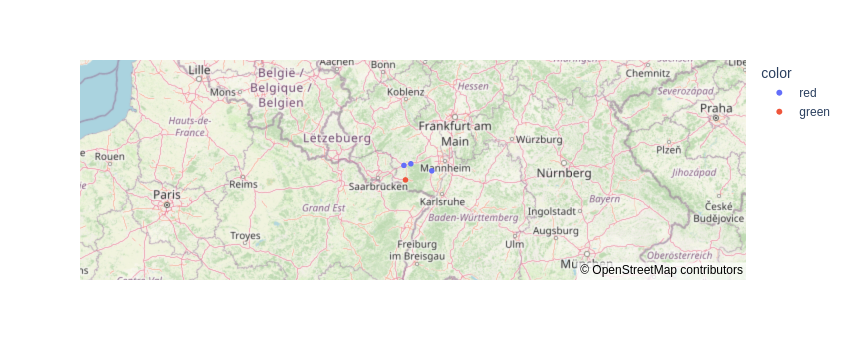

In [18]:
for item in address:
    for index, row in df.iterrows():
        if item == row['address']:
            print(item)
            print(index)
            df['color'].iloc[index] = 'green'
            
fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=5, mapbox_style="open-street-map",
                               color='color')
fig.show()

In [19]:
df['color'].iloc[3]

'green'

In [20]:
df

,address,lat,lon,color
0,"Denisstraße 30, 67663 Kaiserslautern",49.443800,7.717972,red
1,"Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach",49.421087,7.565257,red
2,"Oswald-Wiersich-Straße 3, 67433 Neustadt an de...",49.343355,8.177594,red
3,"Hillstraße 1, 66953 Pirmasens",49.212906,7.599170,green


In [44]:
for i in range(len(address)):
    for index, row in df.iterrows():
        # print(item)
        # print(row['address'], "\n")
        if address[i] == row['address']:
            row['color'].iloc[i] = 'green'
            # print("green")
fig = px.scatter_mapbox(df, lat="lat", lon="lon", zoom=5, mapbox_style="open-street-map",
                               color='color')
fig.show()

AttributeError: 'str' object has no attribute 'iloc'

In [39]:
df

,address,lat,lon,color
0,"Denisstraße 30, 67663 Kaiserslautern",49.443800,7.717972,green
1,"Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach",49.421087,7.565257,green
2,"Oswald-Wiersich-Straße 3, 67433 Neustadt an de...",49.343355,8.177594,green
3,"Hillstraße 1, 66953 Pirmasens",49.212906,7.599170,green


In [33]:
address

['Am Koehlwäldchen 15a, 66877 Ramstein-Miesenbach']